In [ ]:
# -*- coding: utf-8 -*-
#  File: clustering_mef.ipynb
#  Project: 'OTUS.ADV Homework #3'
#  Created by Gennady Matveev (gm@og.ly) on 14-02-2022.

## Markowitz Efficient Frontier  
#### Trying to beat 5 largest cryptocurrencies with clustering approach

![TS Clustering](https://docs.google.com/uc?export=download&id=1kP52pViswEsaHNrJUuCUxwXng4oBY3Cu)

This notebook complements the [main study](https://colab.research.google.com/github/oort77/OTUS_ADV_HW3/blob/main/notebooks/otus_adv_hw3_dtw.ipynb) in time series clustering.

![slice1](https://drive.google.com/uc?export=download&id=15ss2sr9Ecl7nNaeSMo7fI7Gkio713cZQ)

### Import libraries

In [24]:
import pandas as pd
import numpy as np
import pickle
import warnings
import matplotlib.pyplot as plt
plt.style.use('ggplot')
np.random.seed(31415)
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (10, 5)

![slice2](https://drive.google.com/uc?export=download&id=1Bapr76q9lODV4LnZ3WEbHH_TO0_udMaC)

### Portfolio 1: BTC, ETH, XRP, USDT, BNB   
Top 5 CCs by market cap

In [26]:
p1_list = ["BTC", "ETH", "XRP", "USDT", "BNB"]

### Portfolio 2: SOL, LUNA, USDC, ADA, DOGE  
SOL and LUNA come from BTC cluster 0 with 33 coins,  
USDC, ADA and DOGE - from cluster 1 with 54 coins

In [4]:
p2_list = ["SOL", "LUNA", "USDC", "ADA", "DOGE"]

In [5]:
pl = {1: p1_list, 2: p2_list}

![slice3](https://drive.google.com/uc?export=download&id=1Xvrbtz-xHvvk2Tmxtx0B3j-PP2GEjuOD) 

### Load  clustered data

In [6]:
with open("../data/data_day.pickle", "rb") as f:
    clustered_data = pickle.load(f)
p = {}
p[1] = clustered_data[p1_list]
p[2] = clustered_data[p2_list]

In [7]:
p[1].head()

,BTC,ETH,XRP,USDT,BNB
0,42743.03,3240.32,0.7703,1.001,463.38
1,43919.67,3373.03,0.7989,1.000,487.51
2,42575.61,3242.26,0.7678,1.000,475.57
3,43089.83,3309.66,0.7734,1.001,490.36
4,43088.74,3328.63,0.7796,1.000,494.66


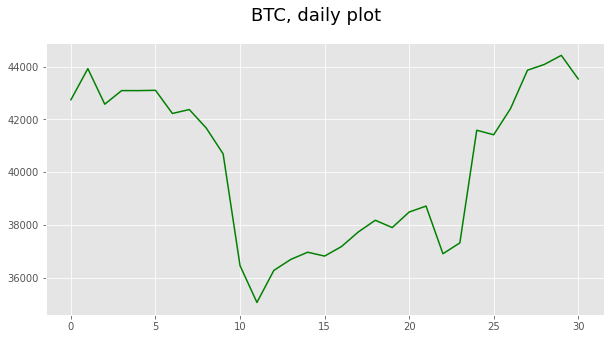

In [39]:
_,_=plt.subplots(figsize=(10,5))
plt.plot(p[1]["BTC"], color="g")
plt.suptitle("BTC, daily plot", fontsize=18)
plt.show()

In [8]:
p[2].head()

,SOL,LUNA,USDC,ADA,DOGE
0,140.25,73.51,1.0000,1.188,0.1538
1,151.51,81.91,1.0000,1.312,0.1630
2,146.20,78.36,1.0000,1.233,0.1717
3,146.18,81.45,1.0000,1.293,0.1834
4,147.74,87.30,0.9996,1.292,0.1846


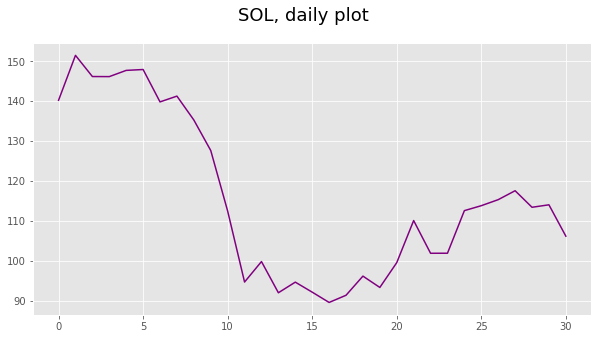

In [41]:
_,_=plt.subplots(figsize=(10,5))
plt.plot(p[2]["SOL"], color="purple")
plt.suptitle("SOL, daily plot", fontsize=18)
plt.show()

![slice4](https://drive.google.com/uc?export=download&id=1qFbd7HLrG88o7RbgexFUygDR2LP82O7-)

### Main function

In [27]:
def sharpe(portfolio):
    data = p[portfolio]
    returns = data/data.shift(1)
    logReturns = np.log(returns)

    noOfPortfolios = 50000

    weight = np.zeros((noOfPortfolios, 5))
    expectedReturn = np.zeros(noOfPortfolios)
    expectedVolatility = np.zeros(noOfPortfolios)
    sharpeRatio = np.zeros(noOfPortfolios)

    meanLogRet = logReturns.mean()
    sigma = logReturns.cov()
    for k in range(noOfPortfolios):
        # generate random weight vector
        w = np.array(np.random.random(5))
        w = w / np.sum(w)
        weight[k,:] = w
        # Expected log return
        expectedReturn[k] = np.sum(meanLogRet * w)
        # Expected volatility
        expectedVolatility[k] = np.sqrt(np.dot(w.T,np.dot(sigma,w)))
        # Sharpe Ratio
        sharpeRatio[k] = expectedReturn[k]/expectedVolatility[k]
    maxIndex = sharpeRatio.argmax()
    plt.figure(figsize=(16,8))
    plt.scatter(expectedVolatility, expectedReturn, c=sharpeRatio)
    plt.xlabel( 'Expected Volatility')
    plt.ylabel( 'Expected Log Returns')
    plt.suptitle(f'Markowitz Efficient Frontier\nPortfolio {portfolio}', fontsize=18)
    plt.colorbar(label='Sharpe Ratio')
    plt.scatter(expectedVolatility[maxIndex], expectedReturn[maxIndex], c='red')
    plt.show()
    return weight[maxIndex,:]


![slice5](https://drive.google.com/uc?export=download&id=1tO_u4a_RioPUolVviZLhJrriXe7kZ3XO) 

### Portfolio 1 optimization

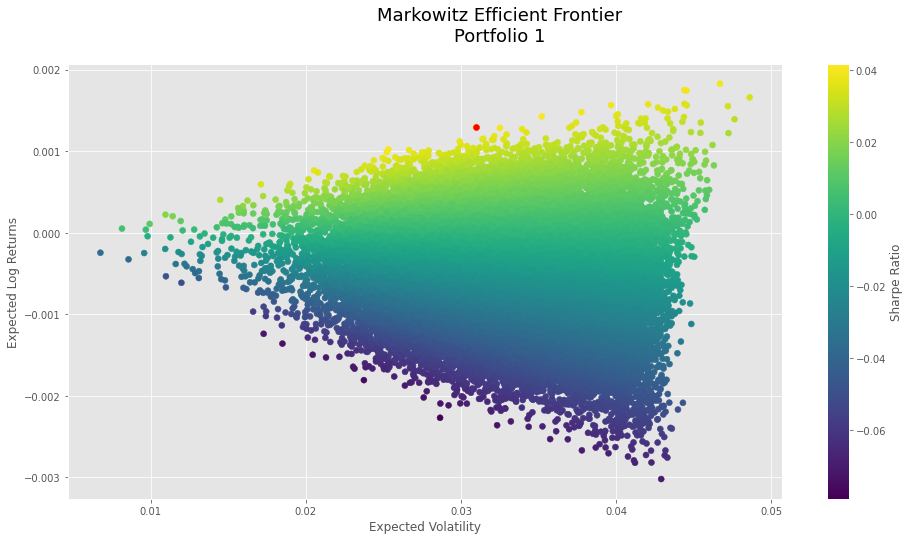

In [28]:
weights = {}
weights[1] = sharpe(1)

![slice6](https://drive.google.com/uc?export=download&id=1updrFKIPTzfVguR8_FQ8kTklpbvIrDqo)

### Portfolio 2 optimization

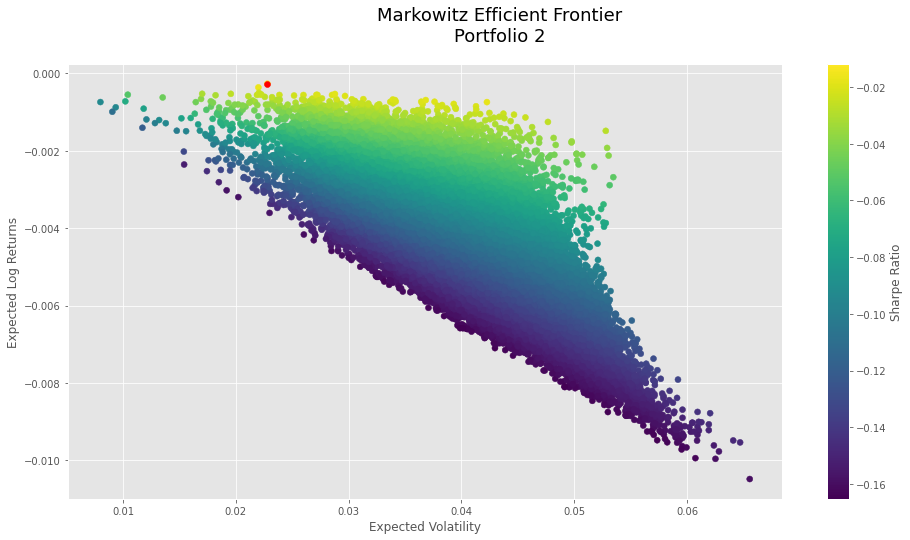

In [29]:
weights[2] = sharpe(2)

![slice1](https://drive.google.com/uc?export=download&id=15ss2sr9Ecl7nNaeSMo7fI7Gkio713cZQ)

###  Plot optimal compostitions of portfolios

In [23]:
def plot_composition(portfolio):
    fig, ax = plt.subplots(figsize=(8,8))
    ex = np.argmax(weights[portfolio])
    explode = np.zeros(5)
    explode[ex] = 0.05
    ax.pie(weights[portfolio], explode=explode, labels=pl[portfolio], autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax.axis('equal') 
    plt.suptitle(f"Portfolio {portfolio}", fontsize=18)
    plt.show()

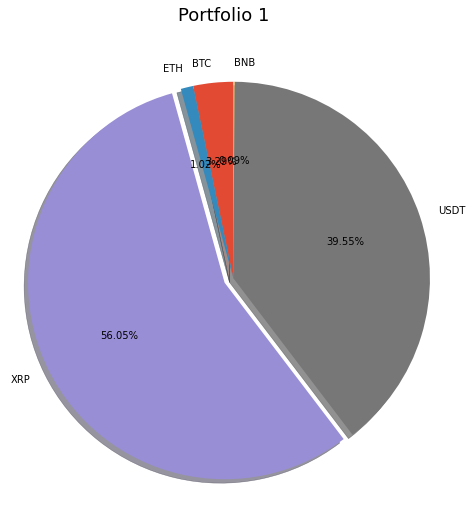

In [21]:
plot_composition(1)

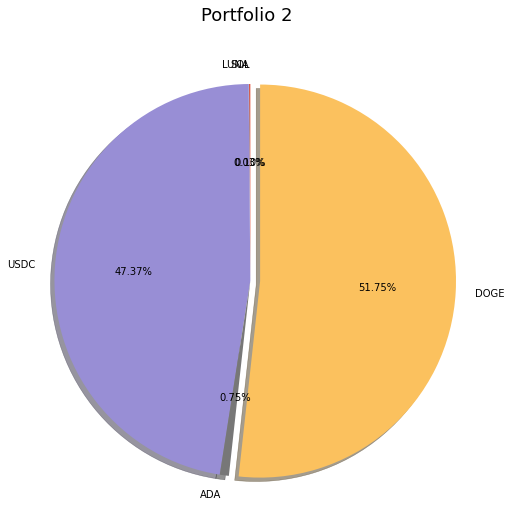

In [22]:
plot_composition(2)

![slice2](https://drive.google.com/uc?export=download&id=1Bapr76q9lODV4LnZ3WEbHH_TO0_udMaC)

### Observations

The alternative portfolio failed to beat top 5 CCs. With most CCs falling during the period, we observe dismal returns for both portfolios. Portfolio 2 has small negative returns in all 50,000 simulations and can not best Portfolio 1 in terms of Sharpe ratio, though it has slightly lower risk. 